In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
# import the data set
from sklearn.datasets import load_wine
wine=load_wine()

In [184]:
# feature matrix
X=wine.data
y=wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [185]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [186]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [187]:
# corroborate the shape of the arrays
print(np.shape(X))
print(np.shape(y))

(178, 13)
(178,)


# Train and test data

In [188]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

In [189]:
# following code is to create the training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
#'test_size': If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples.
#'random_state': If int, random_state is the seed used by the random number generator;

# Scaling

Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

In [190]:
# scale the training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Multo-layer Perceptron (MLP) - Classifier

1. Following the method that we have discussed in class, build an MLPClassifier model to predict the target variable from the feature data.

In [191]:
# now build the neural network using MLPClassifier
from sklearn.neural_network import MLPClassifier

In [204]:
# The following code will create a classifier with three layers of 10 nodes each 
# 'max_iter' refers to the number of epochs, one epoch is a combination of one cycle of feed-forward and back propagation phase.
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=25000)

In [205]:
# now fit the classifier to the training data
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=25000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [206]:
# makign some predictions using your MLPClassifier
predictions=mlp.predict(X_test)

In [207]:
# test predictions
from sklearn.metrics import classification_report, confusion_matrix

In [208]:
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]


In [209]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# Build a loop to test how well different number of hidden layers performs

2.1. You will explore the parameter space of the MLPClassifier model and determine the combination(s) of number of layers and number of neurons that yield the best model accuracy score.

In [210]:
from sklearn import metrics

In [211]:
scores={}
scores_list=[]
l_range=range(4,20,1)
for l in l_range:
    print(l)
    mlp=MLPClassifier(hidden_layer_sizes=(l,l,l),max_iter=2500)
    mlp.fit(X_train,y_train)
    y_pred=mlp.predict(X_test)
    scores[1]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


2.2. Produce a figure that illustrates the results of your analysis.

Text(0, 0.5, 'accuracy score')

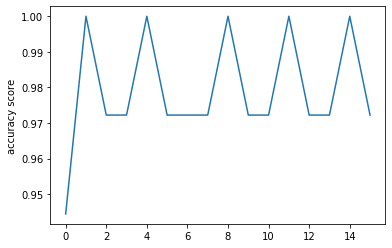

In [212]:
plt.plot(scores_list)
plt.ylabel('accuracy score')

# Build a loop to test how well different number of hidden layers performs on a model with 4 and 5 layers

In [213]:
scores={}
scores_list=[]
l_range=range(4,20,1)

Text(0, 0.5, 'accuracy score')

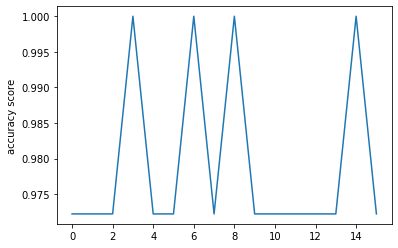

In [214]:
for l in l_range:
    mlp=MLPClassifier(hidden_layer_sizes=(l,l,l,l),max_iter=2000)
    mlp.fit(X_train,y_train)
    y_pred=mlp.predict(X_test)
    scores[1]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(scores_list)
plt.ylabel('accuracy score')

In [215]:
scores={}
scores_list=[]
l_range=range(4,20,1)

Text(0, 0.5, 'accuracy score')

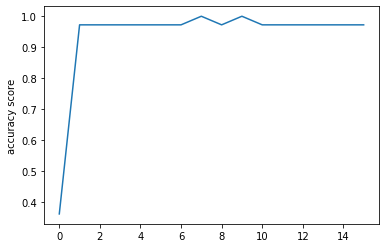

In [216]:
for l in l_range:
    mlp=MLPClassifier(hidden_layer_sizes=(l,l,l,l,l),max_iter=2000)
    mlp.fit(X_train,y_train)
    y_pred=mlp.predict(X_test)
    scores[1]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(scores_list)
plt.ylabel('accuracy score')

2.3 Write a short paragraph explaining your results. If more than one combination of layers/neurons results in a high accuracy score (>0.9), discuss which combination of layers/neurons you would use and why.


    According to the accuracy score from the model with three hidden layers and different number of 'nodes' (figure above), the models with 4,8,11 and 14 nodes have the highest accuracy score. 

    The accuracy score was similar when using four and five hidden layers and more than two nodes (two last figures).



# Test your predictions

3.1 For each combination of layers/neurons that yields an accuracy score > 0.9, calculate the confusion matrix, precision, recall and f1-score for each target class.

In [218]:
mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), max_iter=2000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 1 12  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.92      0.92      0.92        13
           2       1.00      0.92      0.96        13

   micro avg       0.94      0.94      0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [221]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=2000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [222]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=2000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [223]:
mlp = MLPClassifier(hidden_layer_sizes=(14,14,14), max_iter=2000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



3.2 Describe the
implications of your results for model performance for each target class and choose
which layers/neurons you will use in the final version of your model.

    Results from models of three layers and 4, 8, 11 or 12 nodes show similar results in terms of precision, recall, and f1-score. However, among them, the model with 8 nodes has a ‘perfect’ performance. 
    Based on the above results, I will use a model with three hidden layers and 8 nodes for further steps on this problem set.


# Final model

4. Use the final version of your model, developed using the steps above, to predict the
class for the ‘unknown’ samples found in the ‘unknow_wine.csv’ file.

In [231]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=2000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [232]:
# import 'unknown' samples
infile='C:/Users/a_mac/Desktop/unknown_wine.csv'
data=pd.read_csv(infile)

In [236]:
classes = {0:'wine1',1:'wine2',2:'wine3'}

In [245]:
y_predict=mlp.predict(data)

In [246]:
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])
print(classes[y_predict[5]])
print(classes[y_predict[6]])
print(classes[y_predict[7]])
print(classes[y_predict[8]])
print(classes[y_predict[9]])

wine1
wine1
wine1
wine1
wine1
wine1
wine3
wine1
wine1


# Probability

5.1 Find a scikit-learn function that will give the probability that each unknown wine fits into each of one of the three target classes.

In [243]:
mlp.predict_proba(data)
#use 'predict_proba(self,X)'
#Parameters: X:{array-like, sparse matrix} of shape (n_samples, n_features) The input data.
#Returns: y_prob: ndarray of shape (n_samples, n_classes) The predicted probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.        

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 1.28169343e-171],
       [1.00000000e+000, 1.69891702e-233, 1.65641747e-110],
       [1.00000000e+000, 1.62751533e-131, 2.93995896e-072],
       [1.00000000e+000, 2.18337765e-214, 1.55469898e-089],
       [1.00000000e+000, 1.32914870e-068, 9.79798419e-034],
       [1.00000000e+000, 1.57660147e-183, 1.36781245e-087],
       [1.94147366e-011, 1.70790518e-037, 1.00000000e+000],
       [1.00000000e+000, 3.25321941e-141, 1.02002103e-062],
       [1.00000000e+000, 5.03776153e-107, 9.59701835e-056]])

5.2 List the probabilities for each unknown sample for each target class and comment on your results.

    According to the model, all but one of the unknowns correspond to the one type of wine (‘wine1’). The results from the ‘confusion matrix’, ‘classification report’, and probability test, suggest that predictions done by the model should be correct. However, other steps can be applied (i.e. building models holding different sets of training and testing data) for further corroboration of the model.